# A Galton Board Simulation - FINAL NOTEBOOK

[The Galton board](https://en.wikipedia.org/wiki/Galton_board), also known as the Galton box or quincunx or bean machine, is a device invented by Sir Francis Galton[1] to demonstrate the central limit theorem, in particular that with sufficient sample size the binomial distribution approximates a normal distribution. Among its applications, it afforded insight into regression to the mean or "reversion to mediocrity".

## References
1. [Permutations & Combinations](https://www.mathsisfun.com/combinatorics/combinations-permutations.html)
1. [Galton Board](https://www.mathsisfun.com/data/quincunx-explained.html)
1. [Pascals Triangle](https://www.mathsisfun.com/pascals-triangle.html)

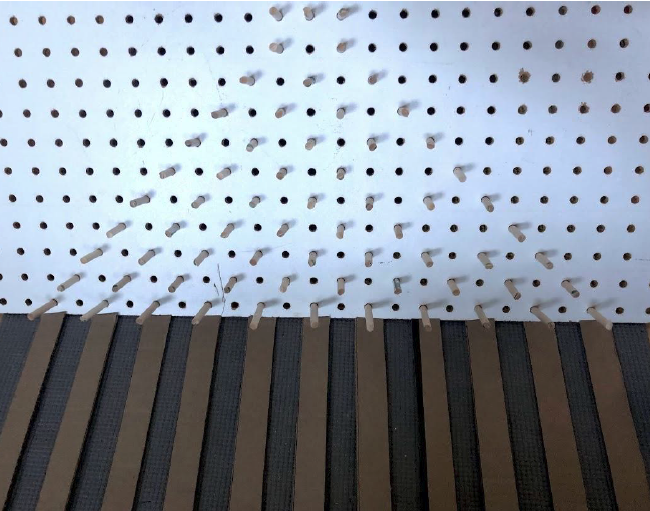

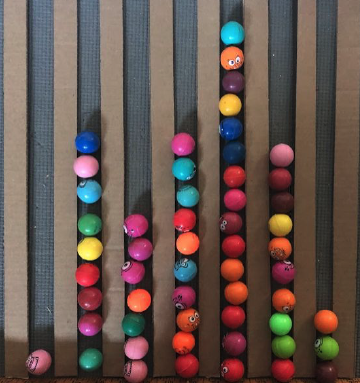

## !!!PUT YOUR TEAM NAME HERE!!!

In [ ]:
from random import randint
import sys
import click
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1. Predicting the Galton Board
1. Paste image of your Pascal's triangle.
1. Enter predictions from pascals triangle into in ```preds``` array.

![pascals](your_pascals_triangle_sketch.jpg)

In [ ]:
preds = [?, ?, ?, ?, ?, ?, ?, ?, ?, ?]
preds_probs = [0] * len(preds)
for i in range(len(preds)):
    preds_probs[i] = preds[i]/sum(preds)*100
preds_probs_pct = [f'{x:.2f}%' for x in preds_probs]
print(preds_probs_pct)

## Task 2. Analyze Team Data from the Galton Board
1. Add one picture from your team's run
1. Enter your team data as shown below.
1. Then run the cells below to plot the graph of your resuts.
1. Compute Team Data Data Probabilities

In [ ]:
def galton(h, b):
    containers = [0] * (h + 1)
    for _ in range(b):
        pos = 0
        for i in range(0, h):
            turn = randint(0, 1)
            if turn == 1:
                pos += 1
        containers[pos] = containers[pos] + 1

    return containers
    
def get_containers(h, e, b, c, t):
    if not e:
        con = galton(h, b)
    else:
        if (c == 1):
            print(f'\nEnter Trial # {t} bins 10 quantities seperated by commas below')
            con = [int(x) for x in input().split(',')]
            b = len(con)
        else:
            print(f'\nsomething went wrong ...')
            sys.exit();
            con = []
    
    return con

def read_team_summary_container(f, tm):
    import pandas as pd # pandas is common for data science
    import numpy as np #NumPy is used a lot in science    read_csv
    df = pd.read_csv(f)
    return list(np.asarray(df[tm]))

def print_graph(dataset):
    for val in dataset:
        for i in range(0, val):
            print('.', end='')
        print(val)
        
def plot_graph(dataset):
    x = np.arange(0,len(dataset),1)
    y = np.asarray(dataset)
    plt.bar(x,y)
    #plt.plot(x,y)

def plot_summary(dataset):
    from scipy.interpolate import make_interp_spline
    import matplotlib.pyplot as plt 
    x = np.arange(0,len(dataset),1)
    y = np.asarray(dataset)
    X_Y_Spline = make_interp_spline(x, y)
    # Returns evenly spaced numbers
    # over a specified interval.
    X_ = np.linspace(x.min(), x.max(), 500)
    Y_ = X_Y_Spline(X_)
    plt.bar(x,y)
    plt.plot(X_,Y_)  

In [ ]:
# h = height of galton board , b = number of balls
#h = 9, b = 55, t = 100
b = 0
c = click.prompt("Experimental Manual (1), Experimental CSV (2) or Simulation (3)", type=int, default=3)
if c == 1:
    e = True
    s = 'Experimental Manual Input'
    g = 1
    h = 9
    t = 5
elif c == 2:
    e = True
    s = 'Experimental CSV Input'
    g = 4
    h = 9
    t = 5
else: 
    e = False
    s = 'Simulated Input'
    h = click.prompt("Enter height", type=int, default=9)
    t = click.prompt("Enter number of trials", type=int, default=5)
    g = click.prompt("Enter number of groups (teams)", type=int, default=4)
    b = click.prompt("Enter number of balls", type=int, default=25)

#h = click.prompt("Enter height", type=int, default=9)
#b = click.prompt("Enter number of balls", type=int, default=25)
#t = click.prompt("Enter number of trials", type=int, default=5)
#g = click.prompt("Enter number of groups (teams)", type=int, default=4)

print(f'\nValidate: {s}, # of trials: {t}')
_ = click.prompt("OK to continue?", type=str, default='Yes')

if _ == 'Yes':
    tbucks = [0] * (h+1)
    if c == 1 or c == 3:
        for j in range (0, g):
            buckets = [0] * (h+1)

            plt.figure()
            for i in range (0, t):
                containers = get_containers(h, e, b, c, i+1)
                print(f'\nTrial #{i+1}')
                #print_graph(containers)
                print(f'{containers} total balls: {sum(containers)}')
                pltidx = f'23{i+1}'
                plt.subplot(int(pltidx))    
                plot_graph(containers)
                buckets = [buckets[i] + containers[i] for i in range(len(buckets))]
            print(f'\nPlotting all trials for team {j+1}')
            plt.show()

            print(f'\nPlotting summation result for team {j+1}')
            print(f'{buckets} total balls: {sum(buckets)}')
            plot_summary(buckets)
            plt.show()

            tbucks = [tbucks[i] + buckets[i] for i in range(len(tbucks))]

        print(f'\nPlotting consolidated summation result for all {g} teams')
        print(f'{tbucks} total balls: {sum(tbucks)}')
        plot_summary(tbucks)
        plt.show()
    else:
        plt.figure()
        for j in range (0, g):
            teamname = f'team{j+1}'
            buckets = read_team_summary_container("allteams_bins.csv",teamname)
            pltidx = f'22{j+1}'
            plt.subplot(int(pltidx))
            plot_graph(buckets)
            tbucks = [tbucks[j] + buckets[j] for j in range(len(tbucks))]
        plt.show()
            
        print(f'\nPlotting consolidated summation result for all {g} teams')
        print(f'{tbucks} total balls: {sum(tbucks)}')
        plot_summary(tbucks)
        plt.show()
else:
    print(f'\nRerun the Galton Board') 
    sys.exit();

In [ ]:
teams_probs = [0] * len(tbucks)
for i in range(len(tbucks)):
    teams_probs[i] = tbucks[i]/sum(tbucks)*100
teams_probs_pct = [f'{x:.2f}%' for x in teams_probs]
print("\nTeam's Actual Probabilities")
print(teams_probs_pct)
print("\nTeam's Predicted Probabilities")
print(preds_probs_pct)
print("\nTeam's Percent Error Predicted vs. Actual Probabilities")
errors_probs = [0] * len(tbucks)
for i in range(len(tbucks)):
    errors_probs[i] = abs(preds_probs[i] - teams_probs[i])
errors_probs_pct = [f'{x:.2f}%' for x in errors_probs]
print(errors_probs_pct)

## Task 3. Analyze Class Summary Data from the Galton Board
1. Add class summary data csv file to your panel on left.
1. Read class summary data from the csv file.
1. Then run the cells below to plot the grpah of your resuts.
1. Compute Class Summary Data Probabilities

In [ ]:
# h = height of galton board , b = number of balls
#h = 9, b = 55, t = 100
b = 0
c = click.prompt("Experimental Manual (1), Experimental CSV (2) or Simulation (3)", type=int, default=3)
if c == 1:
    e = True
    s = 'Experimental Manual Input'
    g = 1
    h = 9
    t = 5
elif c == 2:
    e = True
    s = 'Experimental CSV Input'
    g = 4
    h = 9
    t = 5
else: 
    e = False
    s = 'Simulated Input'
    h = click.prompt("Enter height", type=int, default=9)
    t = click.prompt("Enter number of trials", type=int, default=5)
    g = click.prompt("Enter number of groups (teams)", type=int, default=4)
    b = click.prompt("Enter number of balls", type=int, default=25)

#h = click.prompt("Enter height", type=int, default=9)
#b = click.prompt("Enter number of balls", type=int, default=25)
#t = click.prompt("Enter number of trials", type=int, default=5)
#g = click.prompt("Enter number of groups (teams)", type=int, default=4)

print(f'\nValidate: {s}, # of trials: {t}')
_ = click.prompt("OK to continue?", type=str, default='Yes')

if _ == 'Yes':
    tbucks = [0] * (h+1)
    if c == 1 or c == 3:
        for j in range (0, g):
            buckets = [0] * (h+1)

            plt.figure()
            for i in range (0, t):
                containers = get_containers(h, e, b, c, i+1)
                print(f'\nTrial #{i+1}')
                #print_graph(containers)
                print(f'{containers} total balls: {sum(containers)}')
                pltidx = f'23{i+1}'
                plt.subplot(int(pltidx))    
                plot_graph(containers)
                buckets = [buckets[i] + containers[i] for i in range(len(buckets))]
            print(f'\nPlotting all trials for team {j+1}')
            plt.show()

            print(f'\nPlotting summation result for team {j+1}')
            print(f'{buckets} total balls: {sum(buckets)}')
            plot_summary(buckets)
            plt.show()

            tbucks = [tbucks[i] + buckets[i] for i in range(len(tbucks))]

        print(f'\nPlotting consolidated summation result for all {g} teams')
        print(f'{tbucks} total balls: {sum(tbucks)}')
        plot_summary(tbucks)
        plt.show()
    else:
        plt.figure()
        for j in range (0, g):
            teamname = f'team{j+1}'
            buckets = read_team_summary_container("allteams_bins.csv",teamname)
            pltidx = f'22{j+1}'
            plt.subplot(int(pltidx))
            plot_graph(buckets)
            tbucks = [tbucks[j] + buckets[j] for j in range(len(tbucks))]
        plt.show()
            
        print(f'\nPlotting consolidated summation result for all {g} teams')
        print(f'{tbucks} total balls: {sum(tbucks)}')
        plot_summary(tbucks)
        plt.show()
else:
    print(f'\nRerun the Galton Board') 
    sys.exit();

In [ ]:
cons_probs = [0] * len(tbucks)
for i in range(len(tbucks)):
    cons_probs[i] = tbucks[i]/sum(tbucks)*100
cons_probs_pct = [f'{x:.2f}%' for x in cons_probs]
print("\nConsolidated Teams Actual Probabilities")
print(cons_probs_pct)
print("\nTeam's Predicted Probabilities")
print(preds_probs_pct)
print("\nTeam's Percent Error Predicted vs. Actual Consolidated Probabilities")
errors_probs = [0] * len(tbucks)
for i in range(len(tbucks)):
    errors_probs[i] = abs(cons_probs[i] - preds_probs[i])
errors_probs_pct = [f'{x:.2f}%' for x in errors_probs]
print(errors_probs_pct)

## Task 4. Simulate Galton Board Data and Analyze
1. Enter your team data as shown below.
1. Then run the cells below to plot the graph of your resuts.
1. Compute Simulated Data Probabilities

In [ ]:
# h = height of galton board , b = number of balls
#h = 9, b = 55, t = 100
b = 0
c = click.prompt("Experimental Manual (1), Experimental CSV (2) or Simulation (3)", type=int, default=3)
if c == 1:
    e = True
    s = 'Experimental Manual Input'
    g = 1
    h = 9
    t = 5
elif c == 2:
    e = True
    s = 'Experimental CSV Input'
    g = 4
    h = 9
    t = 5
else: 
    e = False
    s = 'Simulated Input'
    h = click.prompt("Enter height", type=int, default=9)
    t = click.prompt("Enter number of trials", type=int, default=5)
    g = click.prompt("Enter number of groups (teams)", type=int, default=4)
    b = click.prompt("Enter number of balls", type=int, default=25)

#h = click.prompt("Enter height", type=int, default=9)
#b = click.prompt("Enter number of balls", type=int, default=25)
#t = click.prompt("Enter number of trials", type=int, default=5)
#g = click.prompt("Enter number of groups (teams)", type=int, default=4)

print(f'\nValidate: {s}, # of trials: {t}')
_ = click.prompt("OK to continue?", type=str, default='Yes')

if _ == 'Yes':
    tbucks = [0] * (h+1)
    if c == 1 or c == 3:
        for j in range (0, g):
            buckets = [0] * (h+1)

            plt.figure()
            for i in range (0, t):
                containers = get_containers(h, e, b, c, i+1)
                print(f'\nTrial #{i+1}')
                #print_graph(containers)
                print(f'{containers} total balls: {sum(containers)}')
                pltidx = f'23{i+1}'
                plt.subplot(int(pltidx))    
                plot_graph(containers)
                buckets = [buckets[i] + containers[i] for i in range(len(buckets))]
            print(f'\nPlotting all trials for team {j+1}')
            plt.show()

            print(f'\nPlotting summation result for team {j+1}')
            print(f'{buckets} total balls: {sum(buckets)}')
            plot_summary(buckets)
            plt.show()

            tbucks = [tbucks[i] + buckets[i] for i in range(len(tbucks))]

        print(f'\nPlotting consolidated summation result for all {g} teams')
        print(f'{tbucks} total balls: {sum(tbucks)}')
        plot_summary(tbucks)
        plt.show()
    else:
        plt.figure()
        for j in range (0, g):
            teamname = f'team{j+1}'
            buckets = read_team_summary_container("allteams_bins.csv",teamname)
            pltidx = f'22{j+1}'
            plt.subplot(int(pltidx))
            plot_graph(buckets)
            tbucks = [tbucks[j] + buckets[j] for j in range(len(tbucks))]
        plt.show()
            
        print(f'\nPlotting consolidated summation result for all {g} teams')
        print(f'{tbucks} total balls: {sum(tbucks)}')
        plot_summary(tbucks)
        plt.show()
else:
    print(f'\nRerun the Galton Board') 
    sys.exit();

In [ ]:
sims_probs = [0] * len(tbucks)
for i in range(len(tbucks)):
    sims_probs[i] = tbucks[i]/sum(tbucks)*100
sims_probs_pct = [f'{x:.2f}%' for x in sims_probs]
print("\nSimulated Teams Actual Probabilities")
print(sims_probs_pct)
print("\nTeam's Predicted Probabilities")
print(preds_probs_pct)
print("\nTeam's Percent Error Predicted vs. Simulated Teams Probabilities")
errors_probs = [0] * len(tbucks)
for i in range(len(tbucks)):
    errors_probs[i] = abs(sims_probs[i] - preds_probs[i])
errors_probs_pct = [f'{x:.2f}%' for x in errors_probs]
print(errors_probs_pct)

## What else can you learn from the Galton Board?

The Galton Board allows us to explore Pascal's Triangle which the gateway to many wonders of mathematics in the natural world. 

* Pascal's Triangle
* Fibonacci Numbers
* Binomial Coefficients
* Many more ...